In [1]:
import matrixprofile as mp
from matrixprofile.preprocess import preprocess
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# source: https://github.com/owid/covid-19-data/tree/master/public/data/
df = pd.read_csv('../data/owid-covid-data.csv', 
                 usecols=['location', 'date', 'new_cases_smoothed', 
                          'new_tests_smoothed', 'positive_rate'])

In [3]:
def get_country_dfs(df, countries):
    out = []
    for country in countries:
        out.append(df[df['location'] == country])
    return out

In [4]:
country_dfs = get_country_dfs(df, ['Estonia', 'Finland', 'Lithuania'])

In [5]:
et_df = country_dfs[0]

In [6]:
et_df[et_df['positive_rate'].isna()]

,location,date,new_cases_smoothed,new_tests_smoothed,positive_rate
17168,Estonia,2020-02-26,NaN,NaN,NaN
17169,Estonia,2020-02-27,NaN,NaN,NaN
17170,Estonia,2020-02-28,NaN,NaN,NaN
17171,Estonia,2020-02-29,NaN,NaN,NaN
17172,Estonia,2020-03-01,NaN,NaN,NaN
17173,Estonia,2020-03-02,NaN,NaN,NaN
17174,Estonia,2020-03-03,0.286,NaN,NaN
17485,Estonia,2021-01-08,590.143,NaN,NaN
17486,Estonia,2021-01-09,614.286,NaN,NaN
17487,Estonia,2021-01-10,NaN,NaN,NaN


In [7]:
fi_df = country_dfs[1]

In [8]:
lt_df = country_dfs[2]

In [9]:
lt_df[lt_df['positive_rate'].isna()]

,location,date,new_cases_smoothed,new_tests_smoothed,positive_rate
31119,Lithuania,2020-02-23,NaN,NaN,NaN
31120,Lithuania,2020-02-28,NaN,NaN,NaN
31121,Lithuania,2020-02-29,NaN,NaN,NaN
31122,Lithuania,2020-03-01,NaN,NaN,NaN
31123,Lithuania,2020-03-02,NaN,NaN,NaN
31124,Lithuania,2020-03-03,NaN,NaN,NaN
31125,Lithuania,2020-03-04,0.143,NaN,NaN
31126,Lithuania,2020-03-05,0.143,NaN,NaN
31127,Lithuania,2020-03-06,0.000,NaN,NaN
31128,Lithuania,2020-03-07,0.000,NaN,NaN


Lithuanian is the only one that also includes NaN-s in the middle. For others, we can just clip the beginnings and ends with NaN-s.

In [10]:
# TODO: revise. the input time series cannot include NaNs!
ts = preprocess(et_df['positive_rate'].values, window=14)

In [11]:
ts

array([0.015     , 0.027625  , 0.027625  , 0.027625  , 0.027625  ,
       0.027625  , 0.027625  , 0.015     , 0.012     , 0.041     ,
       0.038     , 0.037     , 0.031     , 0.032     , 0.039     ,
       0.029     , 0.116     , 0.144     , 0.133     , 0.133     ,
       0.133     , 0.117     , 0.109     , 0.081     , 0.064     ,
       0.058     , 0.051     , 0.035     , 0.032     , 0.05      ,
       0.046     , 0.051     , 0.048     , 0.045     , 0.043     ,
       0.042     , 0.031     , 0.036     , 0.035     , 0.037     ,
       0.033     , 0.036     , 0.035     , 0.033     , 0.028     ,
       0.026     , 0.022     , 0.023     , 0.022     , 0.021     ,
       0.021     , 0.018     , 0.019     , 0.02      , 0.019     ,
       0.017     , 0.016     , 0.016     , 0.017     , 0.014     ,
       0.013     , 0.013     , 0.012     , 0.012     , 0.011     ,
       0.011     , 0.007     , 0.007     , 0.006     , 0.006     ,
       0.005     , 0.003     , 0.003     , 0.004     , 0.004  

In [12]:
# compute the MatrixProfile
prof = mp.compute(ts, windows=[14])

In [13]:
# mp.discover.motifs return the original input profile with the addition
# of the "motifs" key
prof = mp.discover.motifs(prof)

In [14]:
prof

{'mp': array([2.7648029 , 2.8065277 , 2.732041  , 2.67776114, 1.70822716,
        1.38261752, 1.25483307, 1.11673936, 1.16429002, 1.02068313,
        1.04703261, 1.11527003, 1.15620467, 1.08658719, 1.17398553,
        1.20897766, 0.94575752, 0.86597435, 0.90954529, 0.91581751,
        1.00682642, 1.14991935, 1.55242648, 2.07755807, 2.48284031,
        2.74436122, 3.11298461, 1.83447427, 1.89705771, 1.26715635,
        1.34839355, 1.49296891, 1.56165735, 1.59129808, 1.58028542,
        1.57278421, 1.20144351, 0.90517668, 0.94377783, 0.91025682,
        0.82341171, 0.76830165, 0.8829784 , 1.11381624, 1.39201533,
        1.36851441, 1.19633184, 1.09756964, 1.10647916, 1.24711481,
        0.89311165, 1.09534045, 0.97065343, 1.14261351, 1.1887435 ,
        1.30252871, 1.22630676, 1.15417671, 1.09756964, 0.90517668,
        0.85036864, 0.77013511, 0.61475036, 0.67656871, 0.9266739 ,
        1.03267016, 1.42345061, 1.54514006, 1.69863745, 1.99603179,
        1.99603179, 1.28393838, 1.38650286

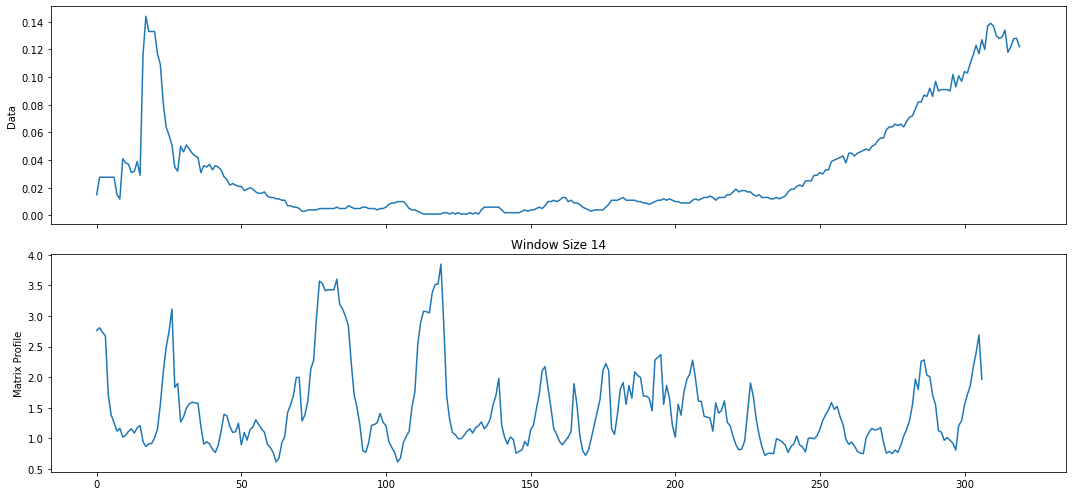

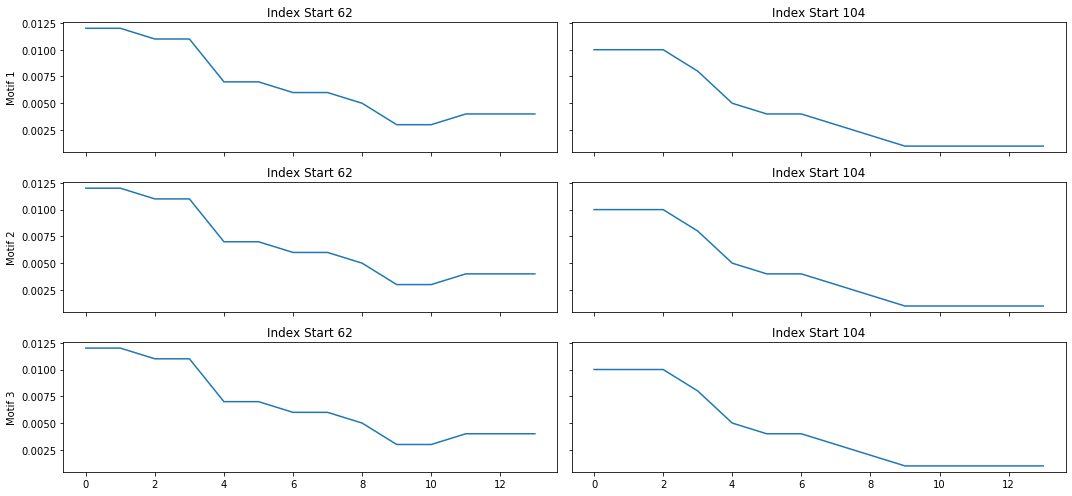

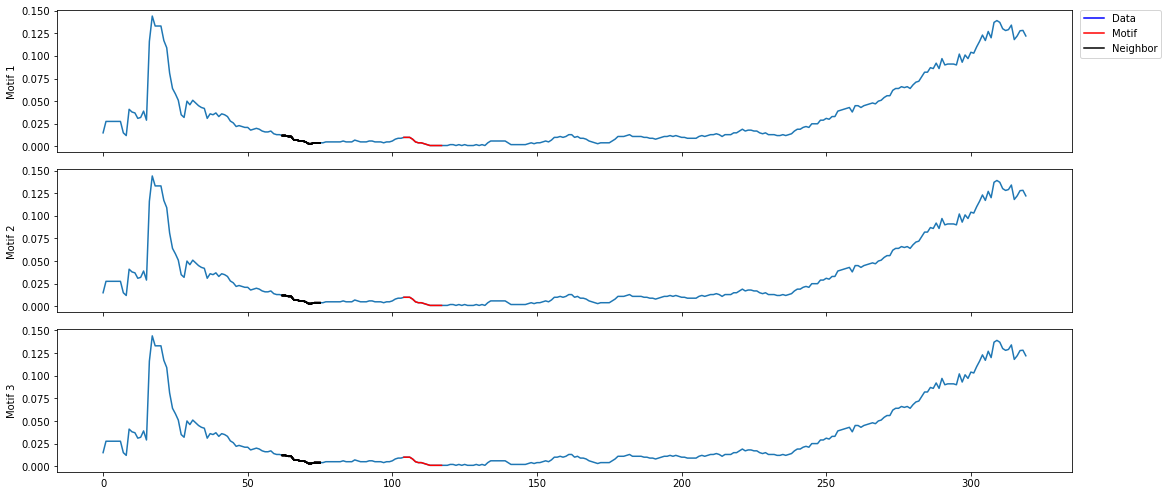

In [15]:
figures = mp.visualize(prof)

In [20]:
# overwrite plotting to visualize with plotly
def plot_motifs(profile):
    w = profile['w']
    motifs = profile['motifs']
    data = profile.get('data', None)
    if data:
        ts = data.get('ts', None)

    seen_motifs = set()
    pair_num = 1
    for motif in motifs:
        if tuple(motif['motifs']) in seen_motifs:
            break
        df = pd.DataFrame(columns=['value', 'start_idx'])
        for idx in motif['motifs']:
            subquery = ts[idx:idx + w]
            indices = np.arange(len(subquery))
            cur_df = pd.DataFrame({'value': subquery,
                                  'start_idx': idx})
            df = pd.concat([df, cur_df])
        fig = px.line(df, x=df.index, y='value', facet_col='start_idx', title=f'Motif {pair_num}')
        # TODO: change
        fig.show('svg')
        pair_num += 1
        seen_motifs.add(tuple(motif['motifs']))
    
    seen_elems = set()
    pair_num = 1
    for motif in motifs:
        if tuple(motif['motifs']) in seen_elems:
            break
        df = pd.DataFrame(columns=['value', 'series_type'])
        df['value'] = ts
        df = df.assign(series_type='regular')
        fig = px.line(df, x=df.index, y='value',
                      title=f'Motif {pair_num}')
        seen_motifs = set()
        first = True
        for i, idx in enumerate(motif['motifs']):
            if idx not in seen_motifs:
                subquery = ts[idx:idx + w]
                indices = np.arange(idx, idx + w)
                #print(indices)
                #df.loc[indices, 'series_type'] = 'motif'
                fig.add_traces(go.Scatter(
                    x=indices,
                      y=subquery,
                      mode = 'lines',
                      line = dict(width = 2, color = 'green'),
                      name = 'motif',
                      legendgroup = 'motif',
                      showlegend = True if first else False,
                                             ))
                seen_motifs.add(idx)
                first = False

        seen_neighbors = set()
        for i, idx in enumerate(motif['neighbors']):
            if idx not in seen_neighbors:
                subquery = ts[idx:idx + w]
                indices = np.arange(idx, idx + w)
                #print(indices)
                #df.loc[indices, 'series_type'] = 'neighbor'
                fig.add_traces(go.Scatter(
                    x=indices,
                      y=subquery,
                      mode = 'lines',
                      line = dict(width = 2, color = 'red'),
                      name = 'neighbor',
                      legendgroup = 'neighbor',
                      showlegend = True,
                                             ))
                seen_neighbors.add(idx)

        # TODO: change       
        fig.show('svg')
        pair_num += 1
        seen_elems.add(tuple(motif['motifs']))

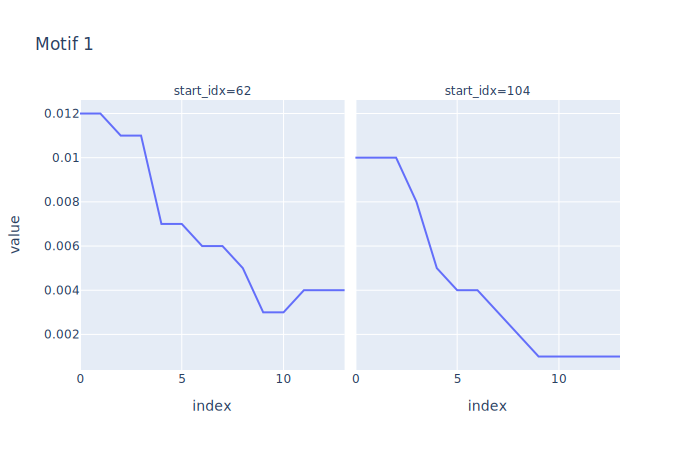

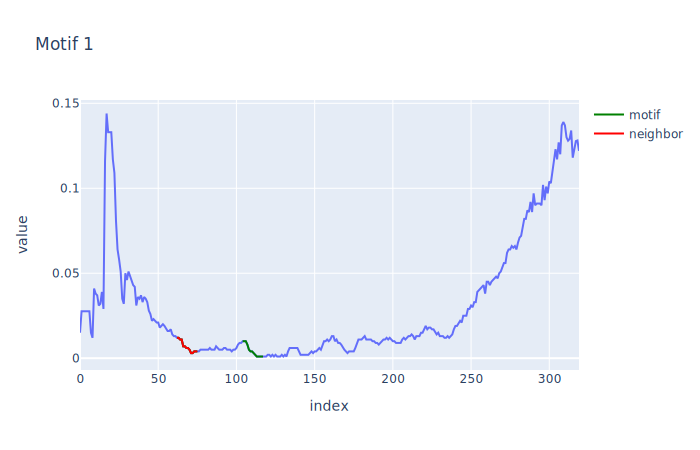

In [21]:
plot_motifs(prof)